In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Path to your dataset
DATA_DIR = "./dataset/"  
TRAIN_DIR = "./dataset/train/"
VALID_DIR = "./dataset/valid/"
TEST_DIR = "./test1/"

# Image dimensions for pretrained models
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

In [5]:
# Data generator with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
   rescale=1./255
) 

# Training data generator
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Validation data generator
validation_generator = val_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 17372 images belonging to 9 classes.
Found 3044 images belonging to 9 classes.
Found 1299 images belonging to 9 classes.


In [ ]:
# Define the MobileNetV2 model
# Load MobileNetV2 with pretrained ImageNet weights
base_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze base layers to retain pretrained features
for layer in base_mobilenet.layers:
    layer.trainable = False

# Custom top layers for plant disease classification
x = base_mobilenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

mobilenet_model = Model(inputs=base_mobilenet.input, outputs=predictions)

# Compile
mobilenet_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


In [ ]:
# Trainin model and save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    filepath='moblienet_best_model.h5',
    monitor='val_accuracy',   
    save_best_only=True,     
    save_weights_only=False,   
    mode='max',                
    verbose=1
)

# Training MobileNetV2
mobilenet_history = mobilenet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=[checkpoint]
)

d:\Coding\Python\NEW\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.5403 - loss: 1.3648
Epoch 1: val_accuracy improved from -inf to 0.90506, saving model to moblienet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 507s 927ms/step - accuracy: 0.5406 - loss: 1.3639 - val_accuracy: 0.9051 - val_loss: 0.3288
Epoch 2/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.8784 - loss: 0.3788
Epoch 2: val_accuracy improved from 0.90506 to 0.93167, saving model to moblienet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 381s 702ms/step - accuracy: 0.8784 - loss: 0.3787 - val_accuracy: 0.9317 - val_loss: 0.2169
Epoch 3/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.9089 - loss: 0.2741
Epoch 3: val_accuracy improved from 0.93167 to 0.94678, saving model to moblienet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 379s 698ms/step - accuracy: 0.9089 - loss: 0.2741 - val_accuracy: 0.9468 - val_loss: 0.1706
Epoch 4/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.9309 - loss: 0.2153
Epoch 4: val_accuracy improved from 0.94678 to 0.95729, saving model to moblienet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 485s 893ms/step - accuracy: 0.9309 - loss: 0.2153 - val_accuracy: 0.9573 - val_loss: 0.1415
Epoch 5/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.9379 - loss: 0.1840
Epoch 5: val_accuracy did not improve from 0.95729
543/543 ━━━━━━━━━━━━━━━━━━━━ 395s 727ms/step - accuracy: 0.9379 - loss: 0.1840 - val_accuracy: 0.9573 - val_loss: 0.1323
Epoch 6/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 0.9430 - loss: 0.1666
Epoch 6: val_accuracy improved from 0.95729 to 0.96551, saving model to moblienet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 377s 694ms/step - accuracy: 0.9430 - loss: 0.1666 - val_accuracy: 0.9655 - val_loss: 0.1149
Epoch 7/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 0.9535 - loss: 0.1406
Epoch 7: val_accuracy did not improve from 0.96551
543/543 ━━━━━━━━━━━━━━━━━━━━ 376s 693ms/step - accuracy: 0.9535 - loss: 0.1406 - val_accuracy: 0.9625 - val_loss: 0.1155
Epoch 8/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 0.9529 - loss: 0.1344
Epoch 8: val_accuracy improved from 0.96551 to 0.97175, saving model to moblienet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 376s 693ms/step - accuracy: 0.9529 - loss: 0.1344 - val_accuracy: 0.9717 - val_loss: 0.0940
Epoch 9/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.9585 - loss: 0.1218
Epoch 9: val_accuracy improved from 0.97175 to 0.97208, saving model to moblienet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 377s 695ms/step - accuracy: 0.9585 - loss: 0.1218 - val_accuracy: 0.9721 - val_loss: 0.0899
Epoch 10/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.9594 - loss: 0.1170
Epoch 10: val_accuracy did not improve from 0.97208
543/543 ━━━━━━━━━━━━━━━━━━━━ 378s 696ms/step - accuracy: 0.9594 - loss: 0.1170 - val_accuracy: 0.9691 - val_loss: 0.0946
Epoch 11/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 0.9629 - loss: 0.1111
Epoch 11: val_accuracy improved from 0.97208 to 0.97240, saving model to moblienet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 377s 694ms/step - accuracy: 0.9629 - loss: 0.1111 - val_accuracy: 0.9724 - val_loss: 0.0867
Epoch 12/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.9663 - loss: 0.1045
Epoch 12: val_accuracy improved from 0.97240 to 0.97799, saving model to moblienet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 378s 696ms/step - accuracy: 0.9663 - loss: 0.1045 - val_accuracy: 0.9780 - val_loss: 0.0770
Epoch 13/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.9643 - loss: 0.1033
Epoch 13: val_accuracy improved from 0.97799 to 0.97832, saving model to moblienet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 382s 704ms/step - accuracy: 0.9643 - loss: 0.1033 - val_accuracy: 0.9783 - val_loss: 0.0733
Epoch 14/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 0.9708 - loss: 0.0906
Epoch 14: val_accuracy did not improve from 0.97832
543/543 ━━━━━━━━━━━━━━━━━━━━ 377s 693ms/step - accuracy: 0.9707 - loss: 0.0907 - val_accuracy: 0.9773 - val_loss: 0.0705
Epoch 15/15
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.9663 - loss: 0.0930
Epoch 15: val_accuracy improved from 0.97832 to 0.98095, saving model to moblienet_best_model.h5


543/543 ━━━━━━━━━━━━━━━━━━━━ 378s 697ms/step - accuracy: 0.9663 - loss: 0.0930 - val_accuracy: 0.9809 - val_loss: 0.0709


In [ ]:
# Function to plot confusion matrix from testing data
mobilenet_model = load_model('moblienet_best_model.h5')

test_steps = test_generator.samples // BATCH_SIZE + 1

mobilenet_preds = mobilenet_model.predict(test_generator, steps=test_steps)

mobilenet_pred_labels = np.argmax(mobilenet_preds, axis=1)

true_labels = test_generator.classes

print("MobileNetV2 Report (Test Set):\n",
      classification_report(true_labels, mobilenet_pred_labels,
                            target_names=list(test_generator.class_indices.keys())))


d:\Coding\Python\NEW\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 440ms/step
MobileNetV2 Report (Test Set):
                        precision    recall  f1-score   support

   Apple___Apple_scab       0.97      0.97      0.97       151
    Apple___Black_rot       0.99      1.00      0.99       149
      Apple___healthy       0.99      0.98      0.98       150
Potato___Early_blight       1.00      0.99      0.99       145
 Potato___Late_blight       0.96      0.91      0.94       145
     Potato___healthy       0.95      0.99      0.97       136
 Tomato___Late_blight       0.93      0.92      0.93       138
   Tomato___Leaf_Mold       0.95      0.99      0.97       141
     Tomato___healthy       0.97      0.98      0.98       144

             accuracy                           0.97      1299
            macro avg       0.97      0.97      0.97      1299
         weighted avg       0.97      0.97      0.97      1299



41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 429ms/step


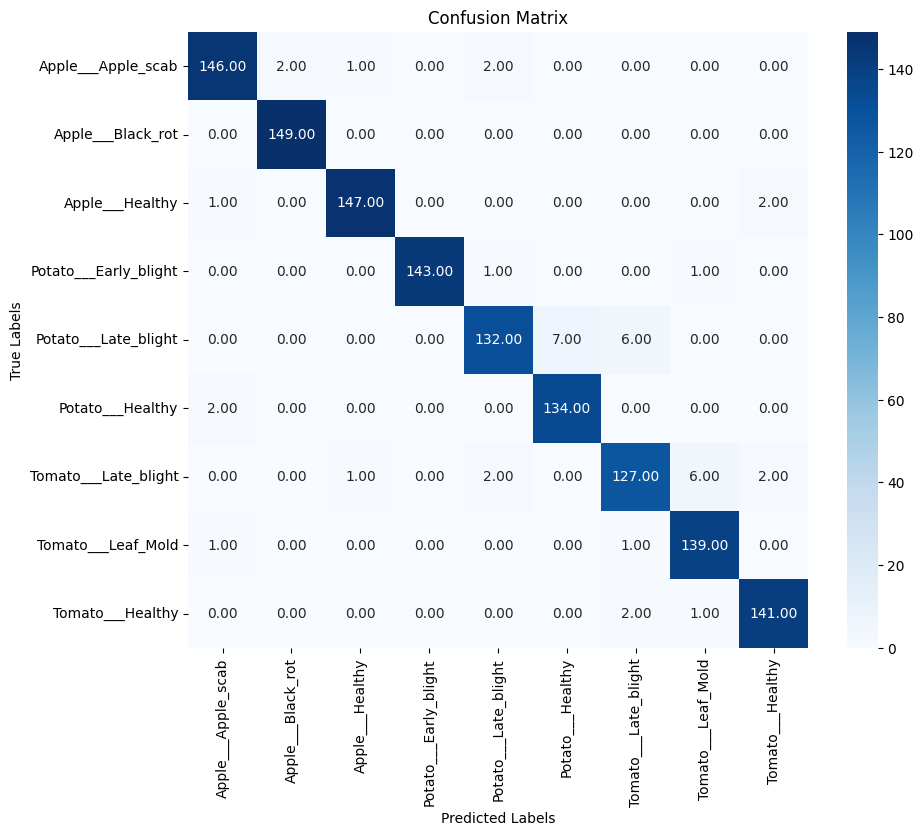

In [ ]:
# Plotting confusion matrix from testing data
def plot_confusion_matrix(model, test_generator, class_names):

    true_labels = test_generator.classes
    pred_probs = model.predict(test_generator)
    pred_labels = np.argmax(pred_probs, axis=1)
    cm = confusion_matrix(true_labels, pred_labels)

    # Plot
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='.2f',
                xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.title('Confusion Matrix')
    plt.show()

class_names = [
    'Apple___Apple_scab',
    'Apple___Black_rot',
    'Apple___Healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___Healthy',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Healthy'
]

# Call the function to plot confusion matrix
plot_confusion_matrix(mobilenet_model, test_generator, class_names)
